## 1. Load the data

In [ ]:
import pandas as pd

df = pd.read_csv('Cleaned_StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   obje

## 2. Prepare the data


Select the response and predictor variables, check for missing values, and split the data into training and validation sets. From results of last check-in, exam scores have highest correlation with student attendance. Therefore, we train the linear regression model using attandance as the predictor.



In [ ]:
from sklearn.model_selection import train_test_split

# Select response and predictor variables
response_variable = 'Exam_Score'
predictor_variables = ['Attendance']

# Check for missing values in selected columns
selected_columns = [response_variable] + predictor_variables
missing_values = df[selected_columns].isnull().sum()

print("Missing values in selected columns:")
print(missing_values)

# Handle missing values (if any) - for simplicity, we'll drop rows with missing values
df_cleaned = df[selected_columns].dropna()

# Split data into training and validation sets
X = df_cleaned[predictor_variables]
y = df_cleaned[response_variable]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training data (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of validation data (X_validation, y_validation):", X_validation.shape, y_validation.shape)

Missing values in selected columns:
Exam_Score    0
Attendance    0
dtype: int64

Shape of training data (X_train, y_train): (5102, 1) (5102,)
Shape of validation data (X_validation, y_validation): (1276, 1) (1276,)


## 3.1 Train a regression model


Import the necessary class and train the linear regression model.



In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

## 3.2 Evaluate the model


To evaluate the performance of the linear regression model, we will calculate the R-squared and Mean Squared Error (MSE) for both the training and validation datasets. R-squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s), while MSE measures the average squared difference between the estimated values and the actual value.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the training and validation sets
y_train_pred = model.predict(X_train)
y_validation_pred = model.predict(X_validation)

# Calculate R-squared for training and validation sets
r2_train = r2_score(y_train, y_train_pred)
r2_validation = r2_score(y_validation, y_validation_pred)

# Calculate Mean Squared Error for training and validation sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_validation = mean_squared_error(y_validation, y_validation_pred)

print("Training Set Evaluation:")
print(f"R-squared: {r2_train:.4f}")
print(f"Mean Squared Error: {mse_train:.4f}")

print("\nValidation Set Evaluation:")
print(f"R-squared: {r2_validation:.4f}")
print(f"Mean Squared Error: {mse_validation:.4f}")

Training Set Evaluation:
R-squared: 0.3314
Mean Squared Error: 10.2054

Validation Set Evaluation:
R-squared: 0.3574
Mean Squared Error: 9.9857


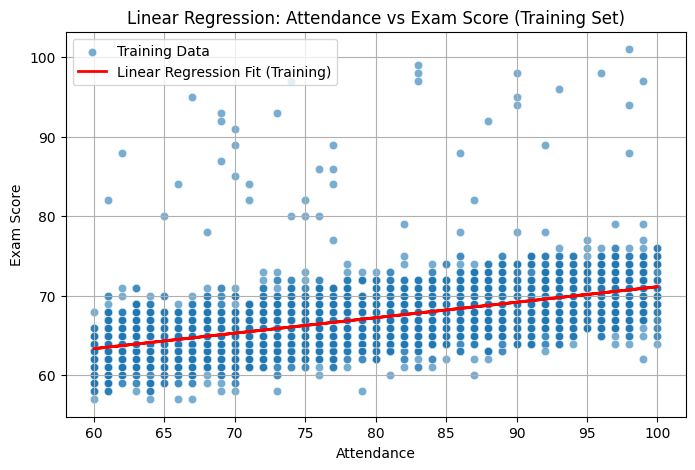

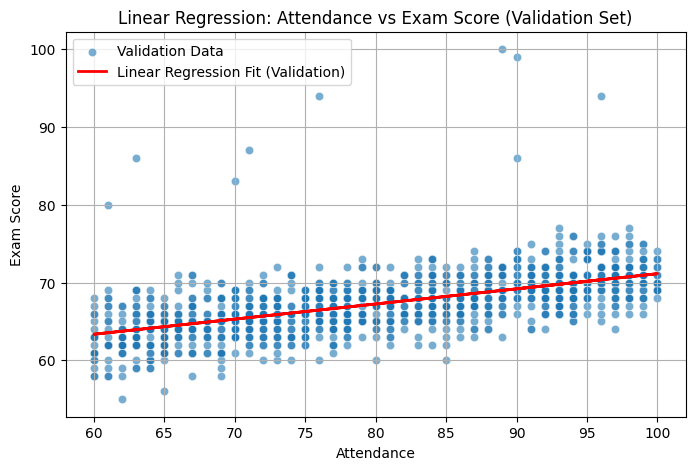

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the training data and the linear regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train['Attendance'], y=y_train, label='Training Data', alpha=0.6)
plt.plot(X_train['Attendance'], y_train_pred, color='red', linewidth=2, label='Linear Regression Fit (Training)')
plt.title('Linear Regression: Attendance vs Exam Score (Training Set)')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the validation data and the linear regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_validation['Attendance'], y=y_validation, label='Validation Data', alpha=0.6)
plt.plot(X_validation['Attendance'], y_validation_pred, color='red', linewidth=2, label='Linear Regression Fit (Validation)')
plt.title('Linear Regression: Attendance vs Exam Score (Validation Set)')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

## 4.Analyze for overfitting/underfitting


We will compare the R-squared and Mean Squared Error (MSE) values for the training and validation sets.

*   **Overfitting** occurs when the model performs very well on the training data but poorly on the validation data. This would be indicated by a significantly higher R-squared on the training set compared to the validation set, and a significantly lower MSE on the training set compared to the validation set.
*   **Underfitting** occurs when the model performs poorly on both the training and validation data. This would be indicated by low R-squared values and high MSE values on both sets.

Based on the calculated R-squared and MSE values:
*   Training R-squared: 0.3314
*   Validation R-squared: 0.3574
*   Training MSE: 10.2054
*   Validation MSE: 9.9857

From the evaluation metrics above, neither underfitting nor overfitting have occurred.

## 5.1 Apply regularization
Choose and apply a regularization technique (e.g., Lasso, Ridge) to the regression model.

In [ ]:
from sklearn.linear_model import Ridge

# Create an instance of the Ridge regression model
# We'll use a small alpha value initially, which can be tuned
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
from sklearn.linear_model import Lasso

# Create an instance of the Lasso regression model
# We'll use a default alpha value of 1.0
lasso_model = Lasso(alpha=1.0)

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

Lasso()

## 5.2 Evaluate the regularized model

Calculate and display evaluation metrics for the regularized model on both training and validation sets.

Calculate and display evaluation metrics for the Lasso model on both training and validation sets to compare its performance with the linear and Ridge regression models.



In [ ]:
# Make predictions on the training and validation sets using the Ridge model
y_train_pred_ridge = ridge_model.predict(X_train)
y_validation_pred_ridge = ridge_model.predict(X_validation)

# Calculate R-squared for training and validation sets for the Ridge model
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_validation_ridge = r2_score(y_validation, y_validation_pred_ridge)

# Calculate Mean Squared Error for training and validation sets for the Ridge model
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_validation_ridge = mean_squared_error(y_validation, y_validation_pred_ridge)

# Make predictions on the training and validation sets using the Lasso model
y_train_pred_lasso = lasso_model.predict(X_train)
y_validation_pred_lasso = lasso_model.predict(X_validation)

# Calculate R-squared for training and validation sets for the Lasso model
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_validation_lasso = r2_score(y_validation, y_validation_pred_lasso)

# Calculate Mean Squared Error for training and validation sets for the Lasso model
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_validation_lasso = mean_squared_error(y_validation, y_validation_pred_lasso)

print("Lasso Model Training Set Evaluation:")
print(f"R-squared: {r2_train_lasso:.4f}")
print(f"Mean Squared Error: {mse_train_lasso:.4f}")

print("\nLasso Model Validation Set Evaluation:")
print(f"R-squared: {r2_validation_lasso:.4f}")
print(f"Mean Squared Error: {mse_validation_lasso:.4f}")

print("\nComparison with Linear and Ridge Regression Models:")
print("Linear Regression Training R-squared:", f"{r2_train:.4f}")
print("Ridge Regression Training R-squared:", f"{r2_train_ridge:.4f}")
print("Lasso Regression Training R-squared:", f"{r2_train_lasso:.4f}")
print("Linear Regression Validation R-squared:", f"{r2_validation:.4f}")
print("Ridge Regression Validation R-squared:", f"{r2_validation_ridge:.4f}")
print("Lasso Regression Validation R-squared:", f"{r2_validation_lasso:.4f}")
print("Linear Regression Training MSE:", f"{mse_train:.4f}")
print("Ridge Regression Training MSE:", f"{mse_train_ridge:.4f}")
print("Lasso Regression Training MSE:", f"{mse_train_lasso:.4f}")
print("Linear Regression Validation MSE:", f"{mse_validation:.4f}")
print("Ridge Regression Validation MSE:", f"{mse_validation_ridge:.4f}")
print("Lasso Regression Validation MSE:", f"{mse_validation_lasso:.4f}")

Lasso Model Training Set Evaluation:
R-squared: 0.3309
Mean Squared Error: 10.2129

Lasso Model Validation Set Evaluation:
R-squared: 0.3556
Mean Squared Error: 10.0134

Comparison with Linear and Ridge Regression Models:
Linear Regression Training R-squared: 0.3314
Ridge Regression Training R-squared: 0.3314
Lasso Regression Training R-squared: 0.3309
Linear Regression Validation R-squared: 0.3574
Ridge Regression Validation R-squared: 0.3574
Lasso Regression Validation R-squared: 0.3556
Linear Regression Training MSE: 10.2054
Ridge Regression Training MSE: 10.2054
Lasso Regression Training MSE: 10.2129
Linear Regression Validation MSE: 9.9857
Ridge Regression Validation MSE: 9.9857
Lasso Regression Validation MSE: 10.0134


## Compare models

Compare the performance of the Linear Regression, Ridge, and Lasso models based on their evaluation metrics.


Based on the results from the previous code block, I will summarize the performance comparison of the three models.



In [ ]:
print("Summary of Model Performance:")
print("-----------------------------")

print("\nTraining Set Performance:")
print(f"Linear Regression R-squared: {r2_train:.4f}, MSE: {mse_train:.4f}")
print(f"Ridge Regression R-squared: {r2_train_ridge:.4f}, MSE: {mse_train_ridge:.4f}")
print(f"Lasso Regression R-squared: {r2_train_lasso:.4f}, MSE: {mse_train_lasso:.4f}")

print("\nValidation Set Performance:")
print(f"Linear Regression R-squared: {r2_validation:.4f}, MSE: {mse_validation:.4f}")
print(f"Ridge Regression R-squared: {r2_validation_ridge:.4f}, MSE: {mse_validation_ridge:.4f}")
print(f"Lasso Regression R-squared: {r2_validation_lasso:.4f}, MSE: {mse_validation_lasso:.4f}")

Summary of Model Performance:
-----------------------------

Training Set Performance:
Linear Regression R-squared: 0.3314, MSE: 10.2054
Ridge Regression R-squared: 0.3314, MSE: 10.2054
Lasso Regression R-squared: 0.3309, MSE: 10.2129

Validation Set Performance:
Linear Regression R-squared: 0.3574, MSE: 9.9857
Ridge Regression R-squared: 0.3574, MSE: 9.9857
Lasso Regression R-squared: 0.3556, MSE: 10.0134


##Analysis:
Comparing the training and validation R-squared and MSE values across the three models (Linear Regression, Ridge, and Lasso), we observe very similar performance.
For both the training and validation sets, the R-squared values are relatively low (around 0.33-0.36), and the MSE values are around 10.
The differences in performance between the training and validation sets for each model are also small, suggesting neither significant overfitting nor underfitting with the chosen predictor ('Attendance') and the default regularization parameters (alpha=1.0 for both Ridge and Lasso).
The regularization techniques (Ridge and Lasso) with the default alpha value did not significantly alter the model's performance compared to the standard Linear Regression model.
This indicates that with a single predictor like 'Attendance', which has a moderate correlation with 'Exam_Score', the impact of regularization at this alpha level is minimal.